In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     

In [5]:
import ipywidgets as widgets
from IPython.display import display

uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)

FileUpload(value=(), accept='.csv', description='Upload')

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

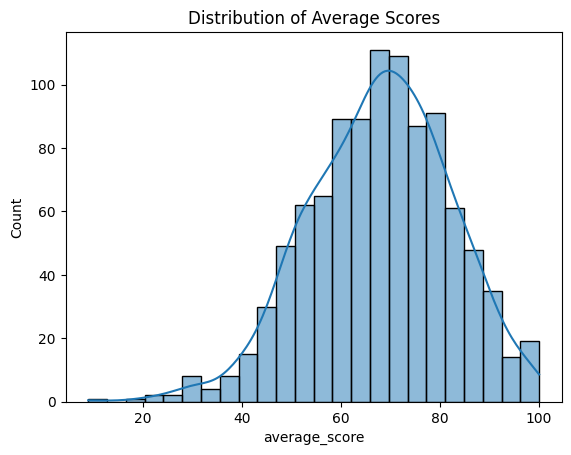

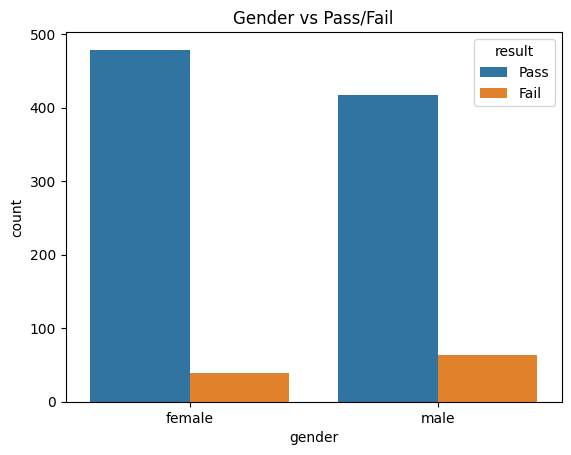

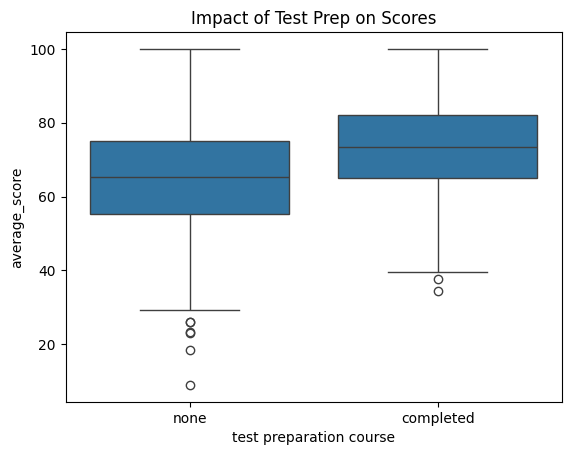

In [8]:
# Load the uploaded CSV file into a DataFrame
import io

df = pd.read_csv(io.BytesIO(uploader.value[0]['content']))

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())

# Check for null values
print(df.isnull().sum())

# Add average score and pass/fail label
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['result'] = df['average_score'].apply(lambda x: 'Pass' if x >= 50 else 'Fail')

# Visualize average scores
sns.histplot(df['average_score'], kde=True)
plt.title('Distribution of Average Scores')
plt.show()

# Gender vs Result
sns.countplot(data=df, x='gender', hue='result')
plt.title('Gender vs Pass/Fail')
plt.show()

# Test Prep Effect
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Impact of Test Prep on Scores')
plt.show()